In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'../data/')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [12]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [13]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


In [14]:
X_train, y_train = split_data(big_train_df, 'wind_speed_mean', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'wind_speed_mean', columns_to_drop)


Epoch 1/100
1940/1940 [==============================] - 3s 1ms/step - loss: 756.3546 - val_loss: 3.5568
Epoch 2/100
1940/1940 [==============================] - 2s 1ms/step - loss: 2.1438 - val_loss: 1.5085
Epoch 3/100
1940/1940 [==============================] - 2s 1ms/step - loss: 3.4270 - val_loss: 1.9068
Epoch 4/100
1940/1940 [==============================] - 2s 1ms/step - loss: 6.0904 - val_loss: 2.4787
Epoch 5/100
1940/1940 [==============================] - 2s 1ms/step - loss: 5.5763 - val_loss: 1.0960
Epoch 6/100
1940/1940 [==============================] - 2s 1ms/step - loss: 1.7630 - val_loss: 0.5991
Epoch 7/100
1940/1940 [==============================] - 2s 1ms/step - loss: 1.7017 - val_loss: 0.5364
Epoch 8/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.9720 - val_loss: 0.3799
Epoch 9/100
1940/1940 [==============================] - 2s 1ms/step - loss: 1.0801 - val_loss: 0.6028
Epoch 10/100
1940/1940 [==============================] - 2s 1ms/step -

Epoch 80/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1329 - val_loss: 0.1089
Epoch 81/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1305 - val_loss: 0.1145
Epoch 82/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1327 - val_loss: 0.1395
Epoch 83/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1335 - val_loss: 0.1937
Epoch 84/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1328 - val_loss: 0.1078
Epoch 85/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1305 - val_loss: 0.1101
Epoch 86/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1326 - val_loss: 0.1186
Epoch 87/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1301 - val_loss: 0.1087
Epoch 88/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1342 - val_loss: 0.1156
Epoch 89/100
1940/1940 [==============================] - 2s 1ms

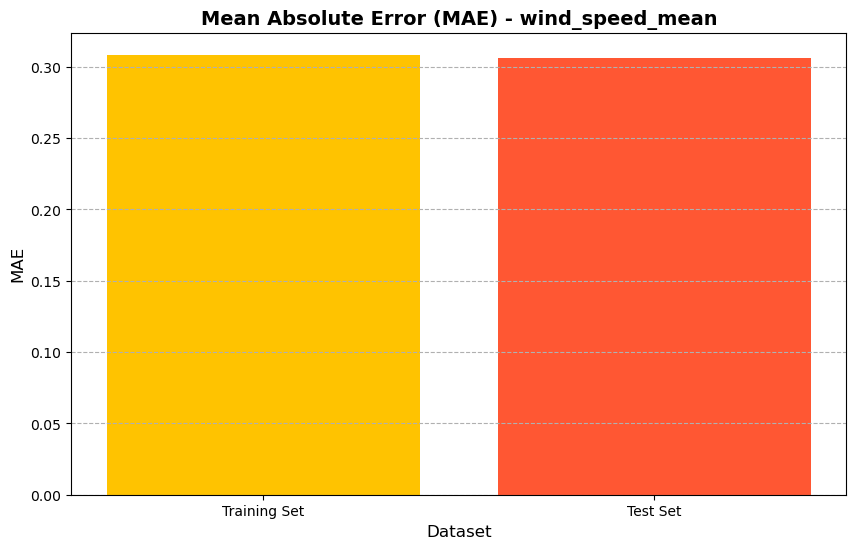

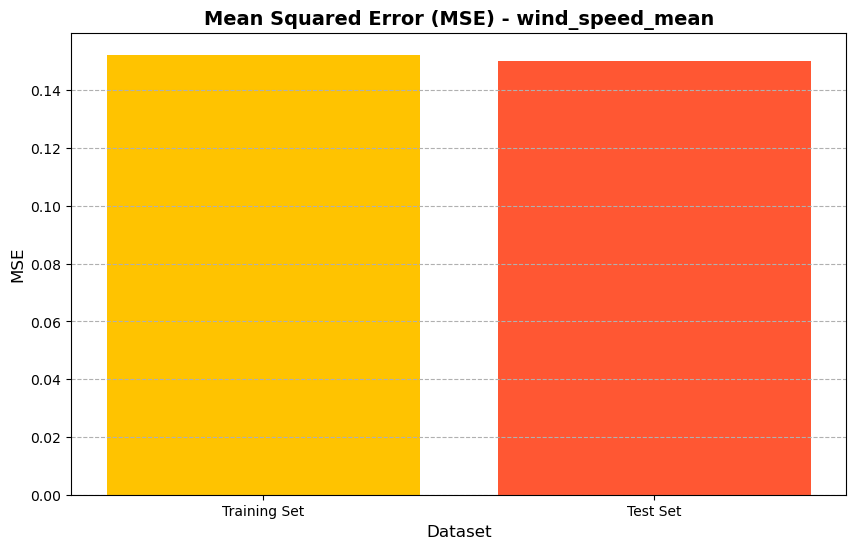

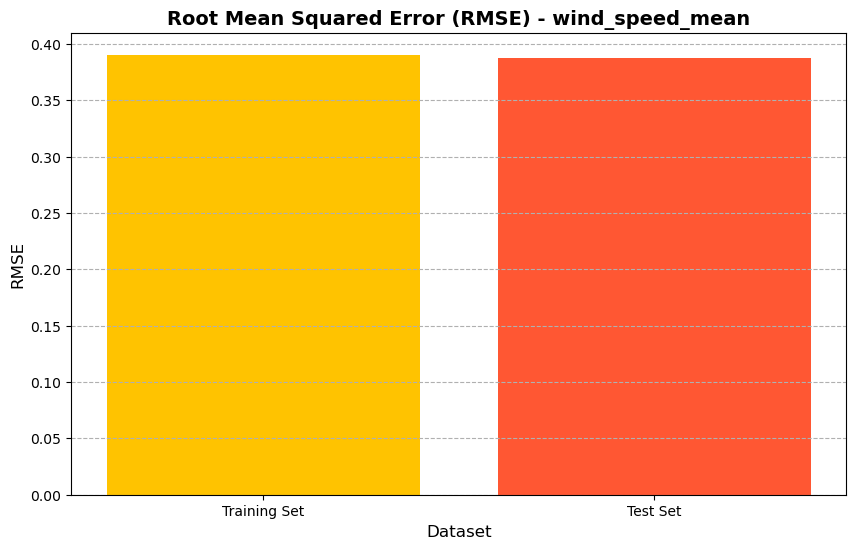

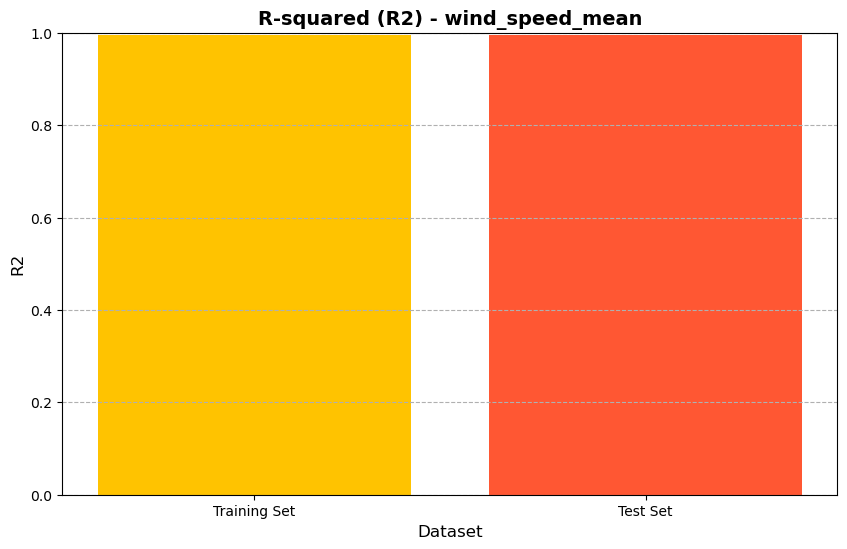

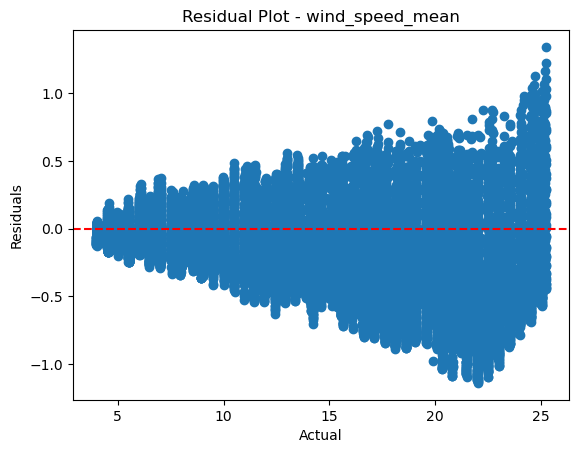

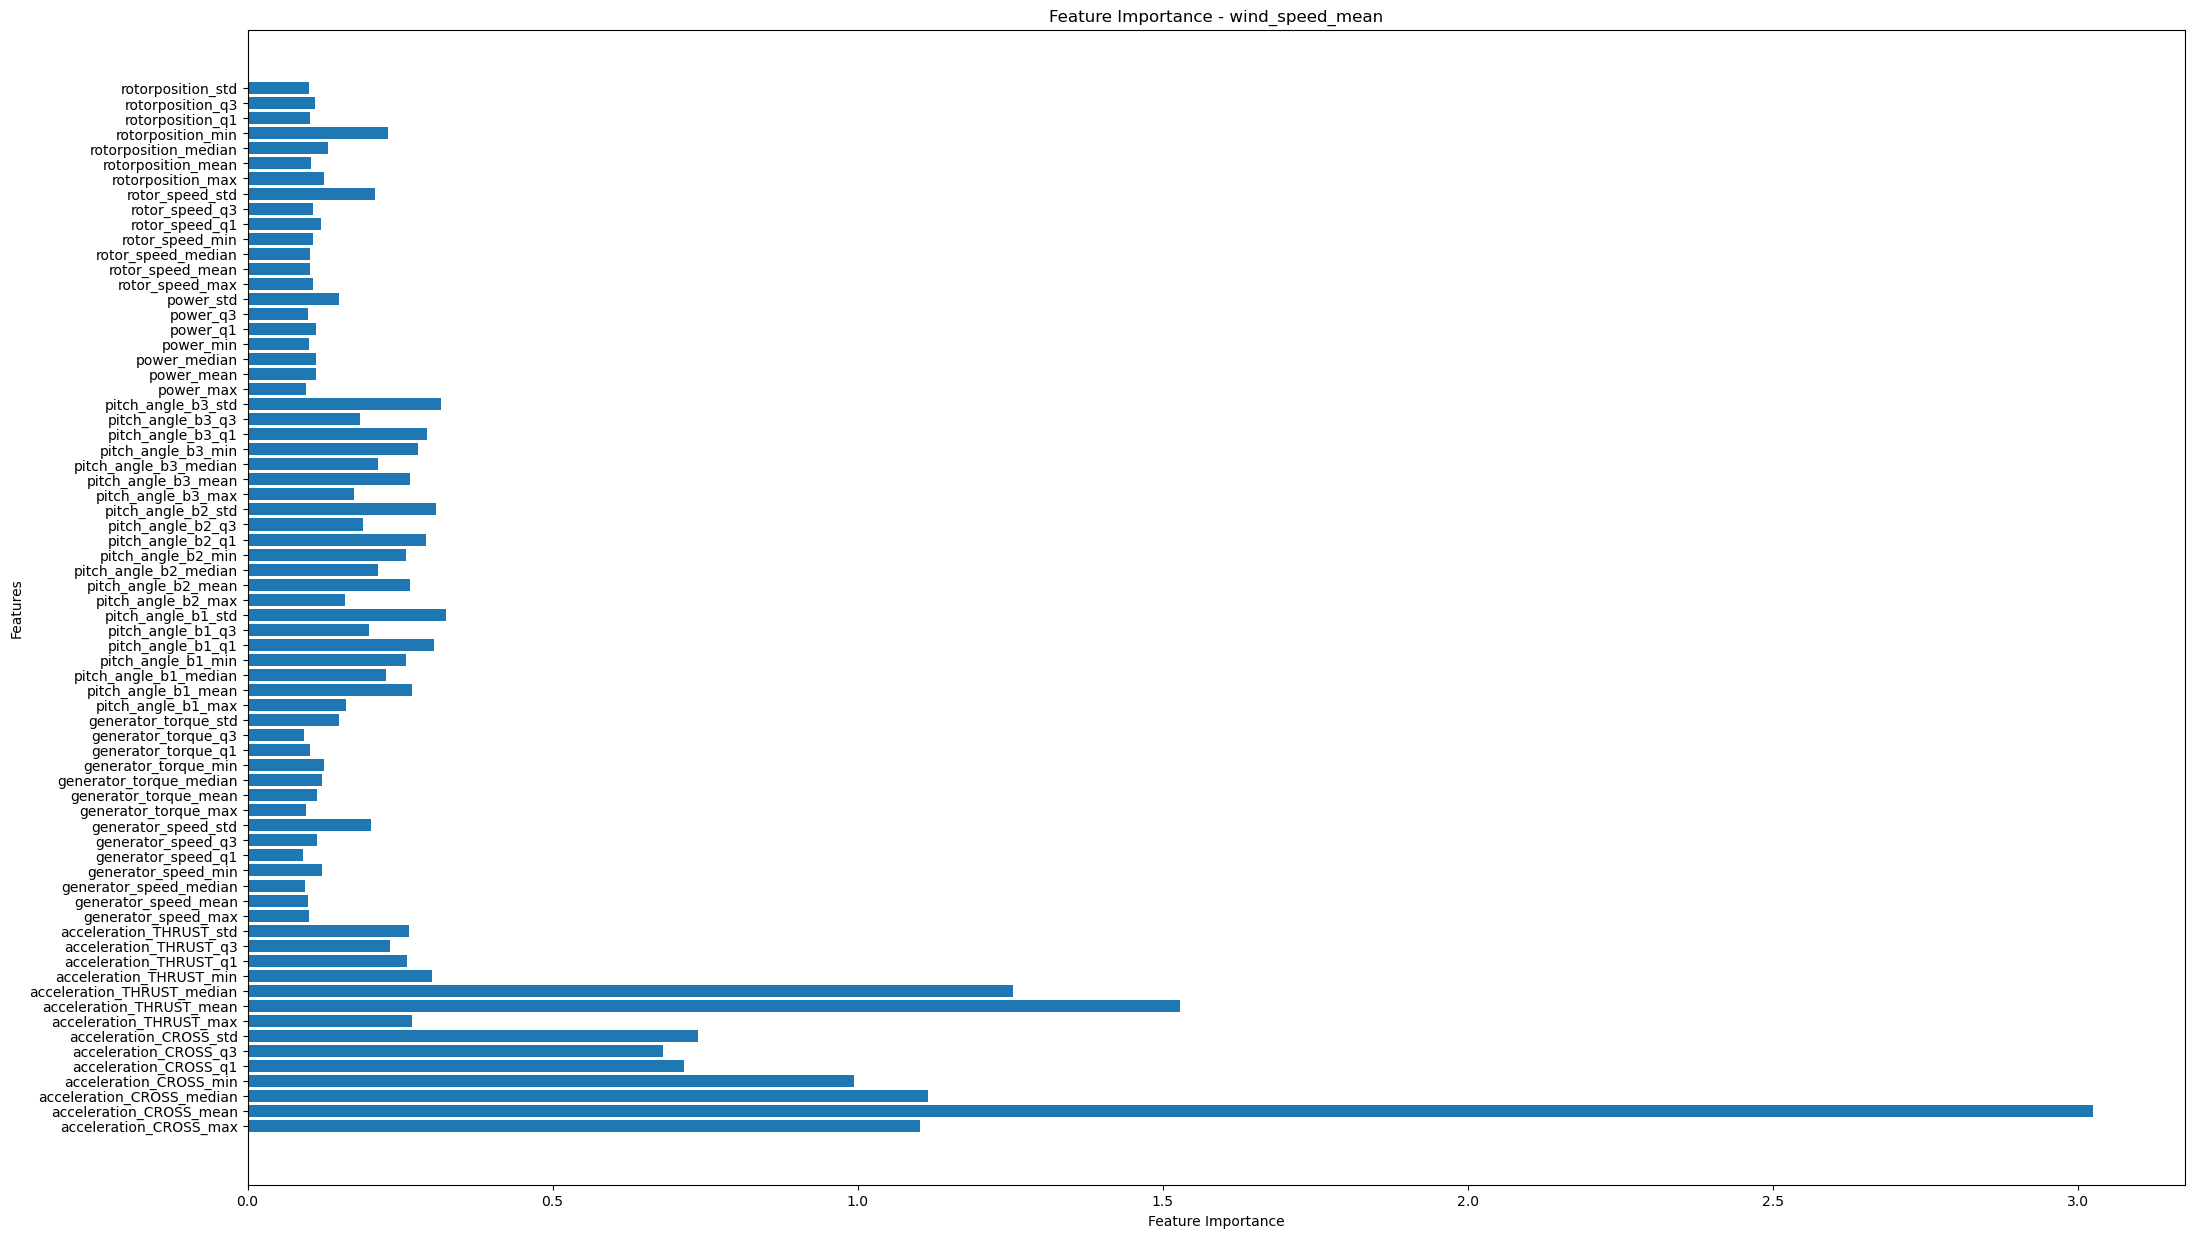

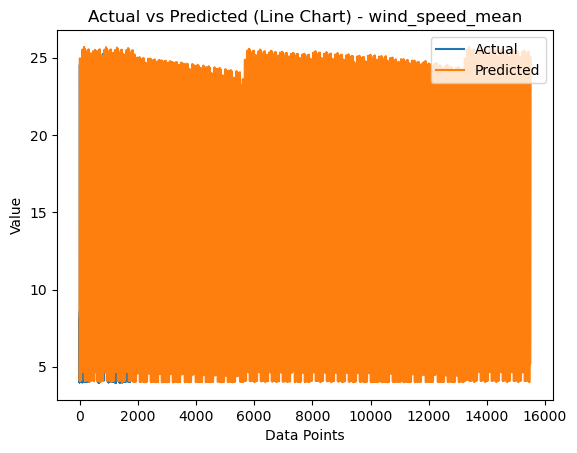

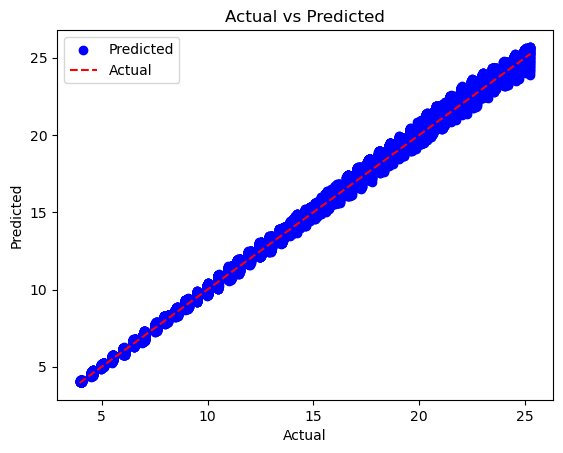

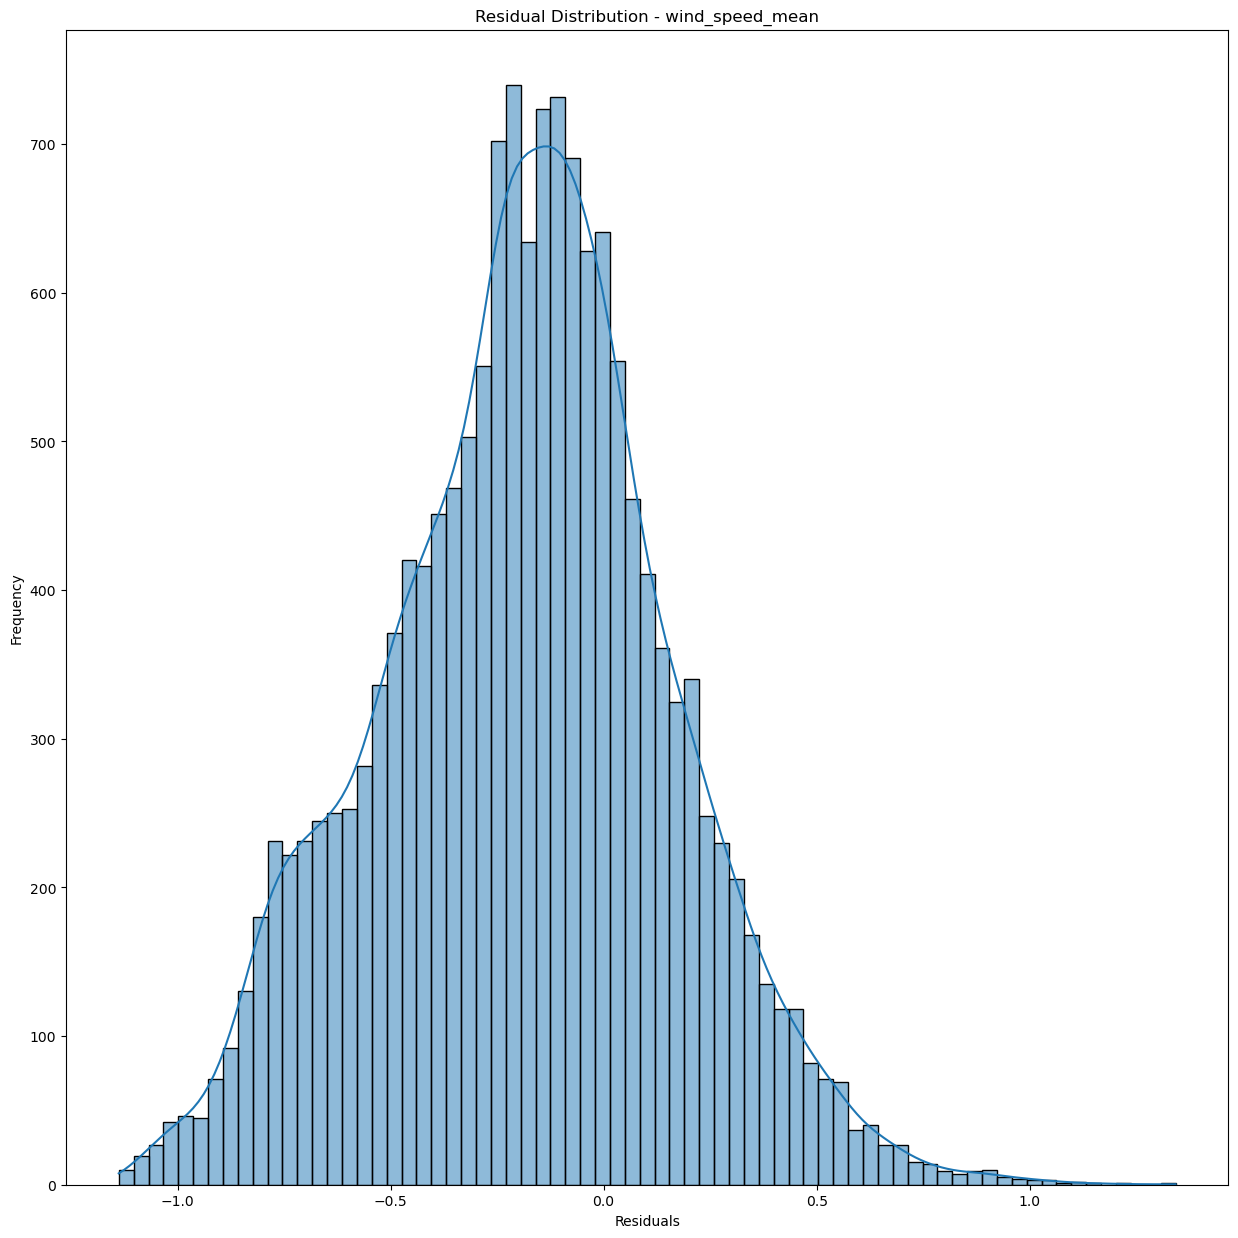

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Target Variable:", target_variable)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print()

mae_values = [train_mae, test_mae]
mse_values = [train_mse, test_mse]
rmse_values = [train_rmse, test_rmse]
r2_values = [train_r2, test_r2]

labels = ['Training Set', 'Test Set']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, mae_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Mean Absolute Error (MAE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Mean Squared Error (MSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Root Mean Squared Error (RMSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, r2_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('R2', fontsize=12)
plt.title('R-squared (R2) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(top=1)
plt.grid(axis='y', linestyle='--')
plt.show()

residuals = np.squeeze(y_test) - np.squeeze(test_predictions)
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot - {}'.format(target_variable))
plt.show()

feature_names = X_train.columns
feature_importances = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(feature_importances), axis=1)
plt.figure(figsize=(25, 15))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - {}'.format(target_variable))
plt.show()


plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Line Chart) - {}'.format(target_variable))
plt.legend()
plt.show()

plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(15, 15))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution - {}'.format(target_variable))
plt.show()


In [17]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y
X_train, y_train = split_data(big_train_df, 'yaw_error_mean', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'yaw_error_mean', columns_to_drop)


Epoch 1/100
1940/1940 [==============================] - 3s 1ms/step - loss: 277.6670 - val_loss: 203.7162
Epoch 2/100
1940/1940 [==============================] - 2s 1ms/step - loss: 181.0072 - val_loss: 144.5532
Epoch 3/100
1940/1940 [==============================] - 2s 1ms/step - loss: 163.7649 - val_loss: 147.9362
Epoch 4/100
1940/1940 [==============================] - 2s 1ms/step - loss: 154.0839 - val_loss: 168.4599
Epoch 5/100
1940/1940 [==============================] - 2s 1ms/step - loss: 146.3779 - val_loss: 145.1120
Epoch 6/100
1940/1940 [==============================] - 2s 1ms/step - loss: 142.2982 - val_loss: 140.0683
Epoch 7/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0829 - val_loss: 140.0004
Epoch 8/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0313 - val_loss: 140.0178
Epoch 9/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0277 - val_loss: 140.0177
Epoch 10/100
1940/1940 [=============

Epoch 77/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0248 - val_loss: 140.0177
Epoch 78/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0244 - val_loss: 140.0179
Epoch 79/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0246 - val_loss: 140.0178
Epoch 80/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0249 - val_loss: 140.0177
Epoch 81/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0246 - val_loss: 140.0177
Epoch 82/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0242 - val_loss: 140.0176
Epoch 83/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0246 - val_loss: 140.0177
Epoch 84/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0248 - val_loss: 140.0176
Epoch 85/100
1940/1940 [==============================] - 2s 1ms/step - loss: 140.0248 - val_loss: 140.0177
Epoch 86/100
1940/1940 [====

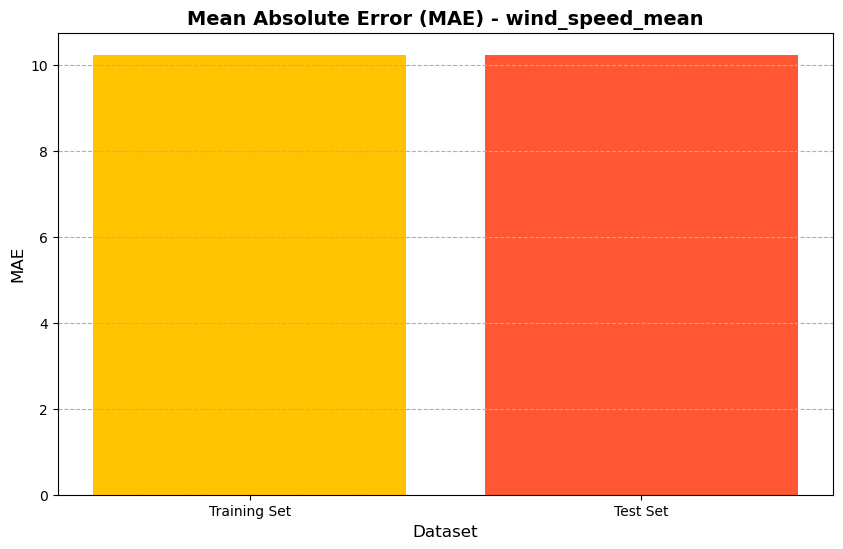

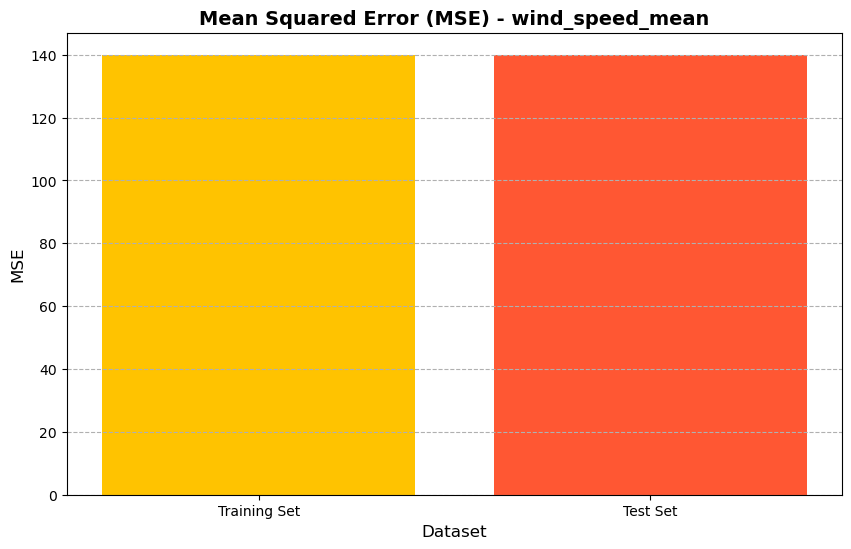

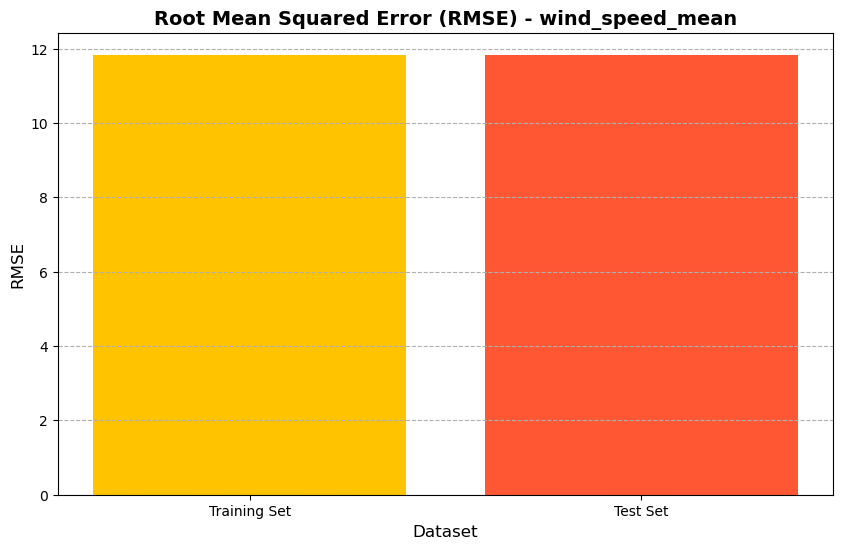

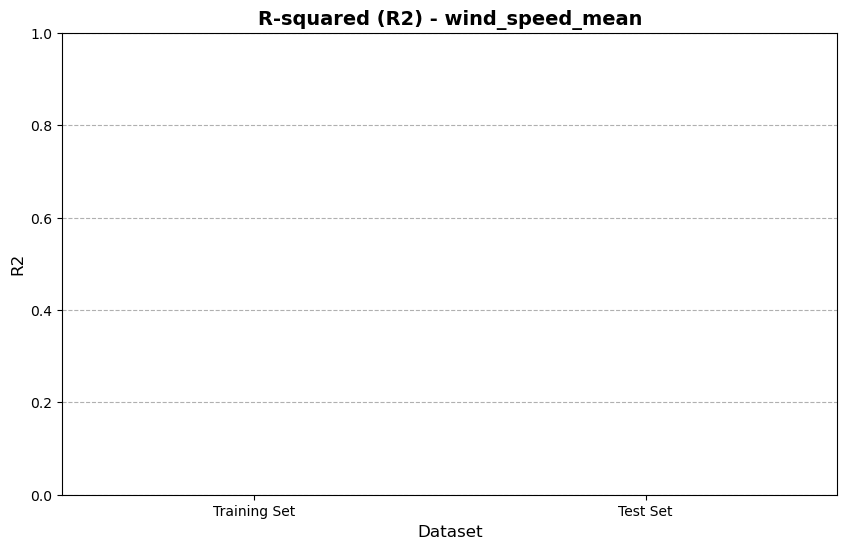

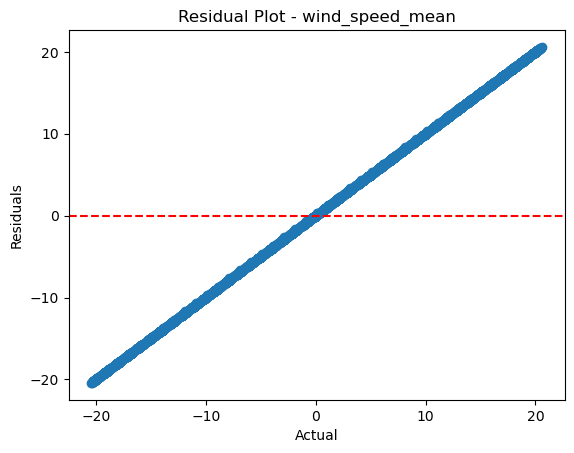

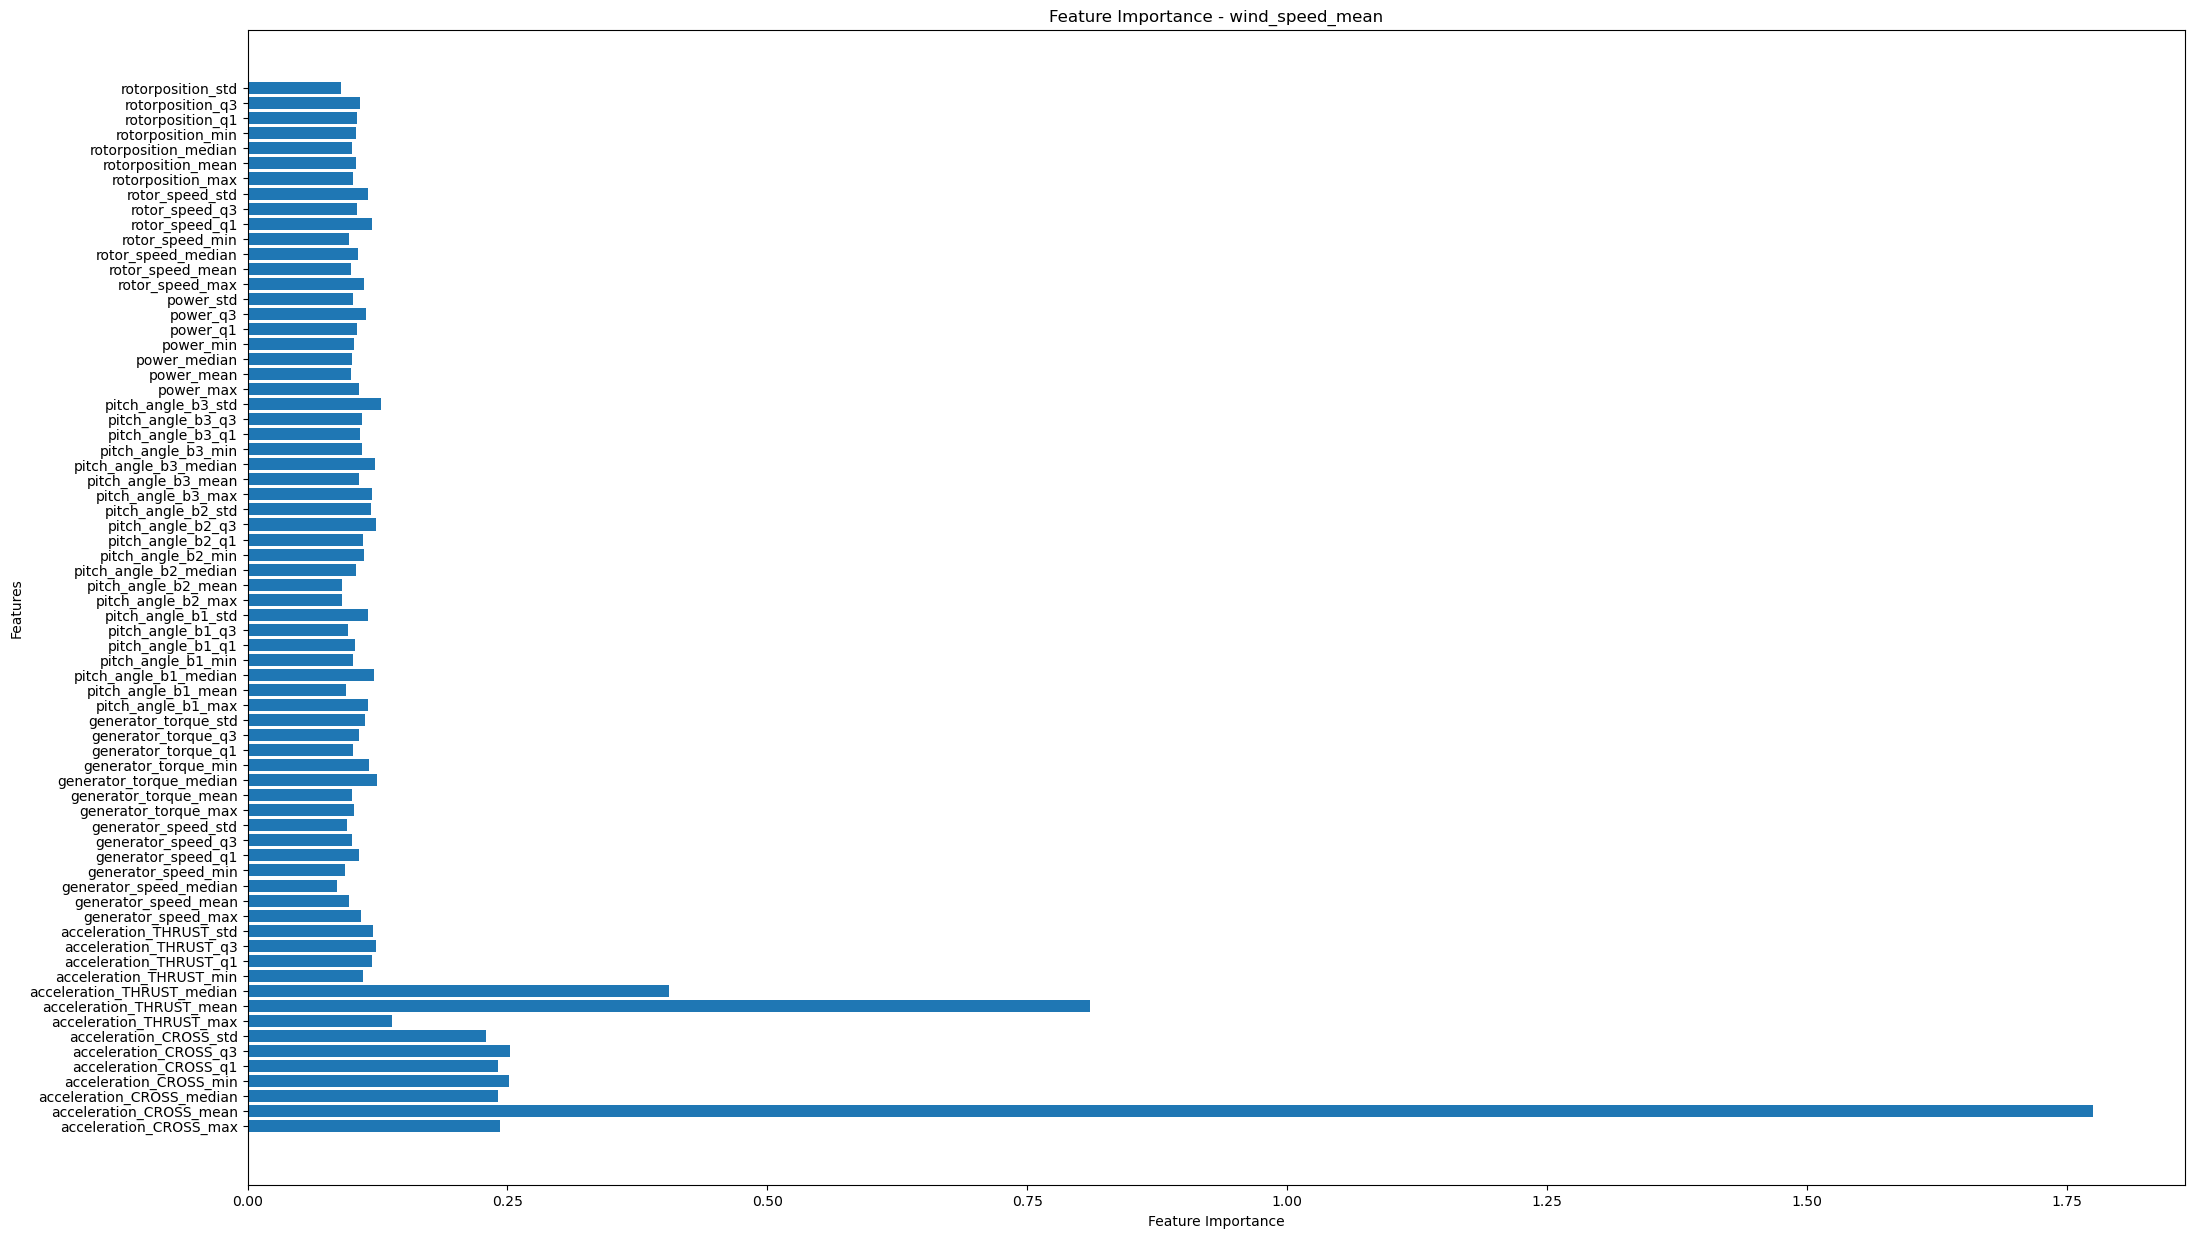

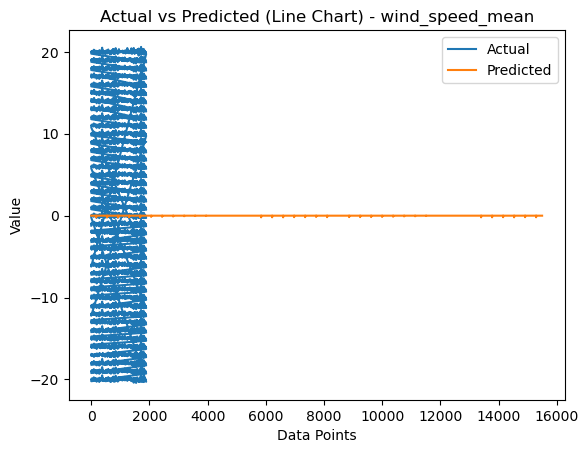

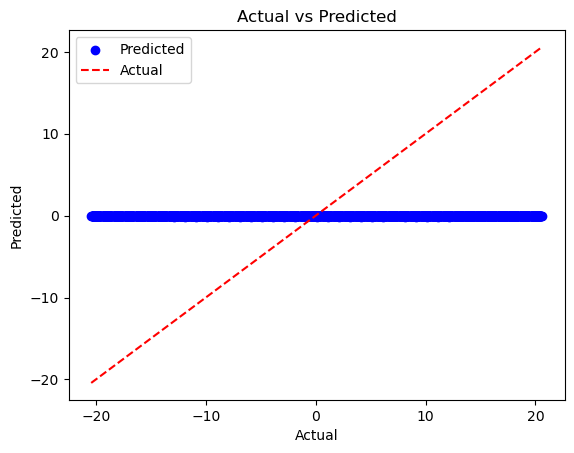

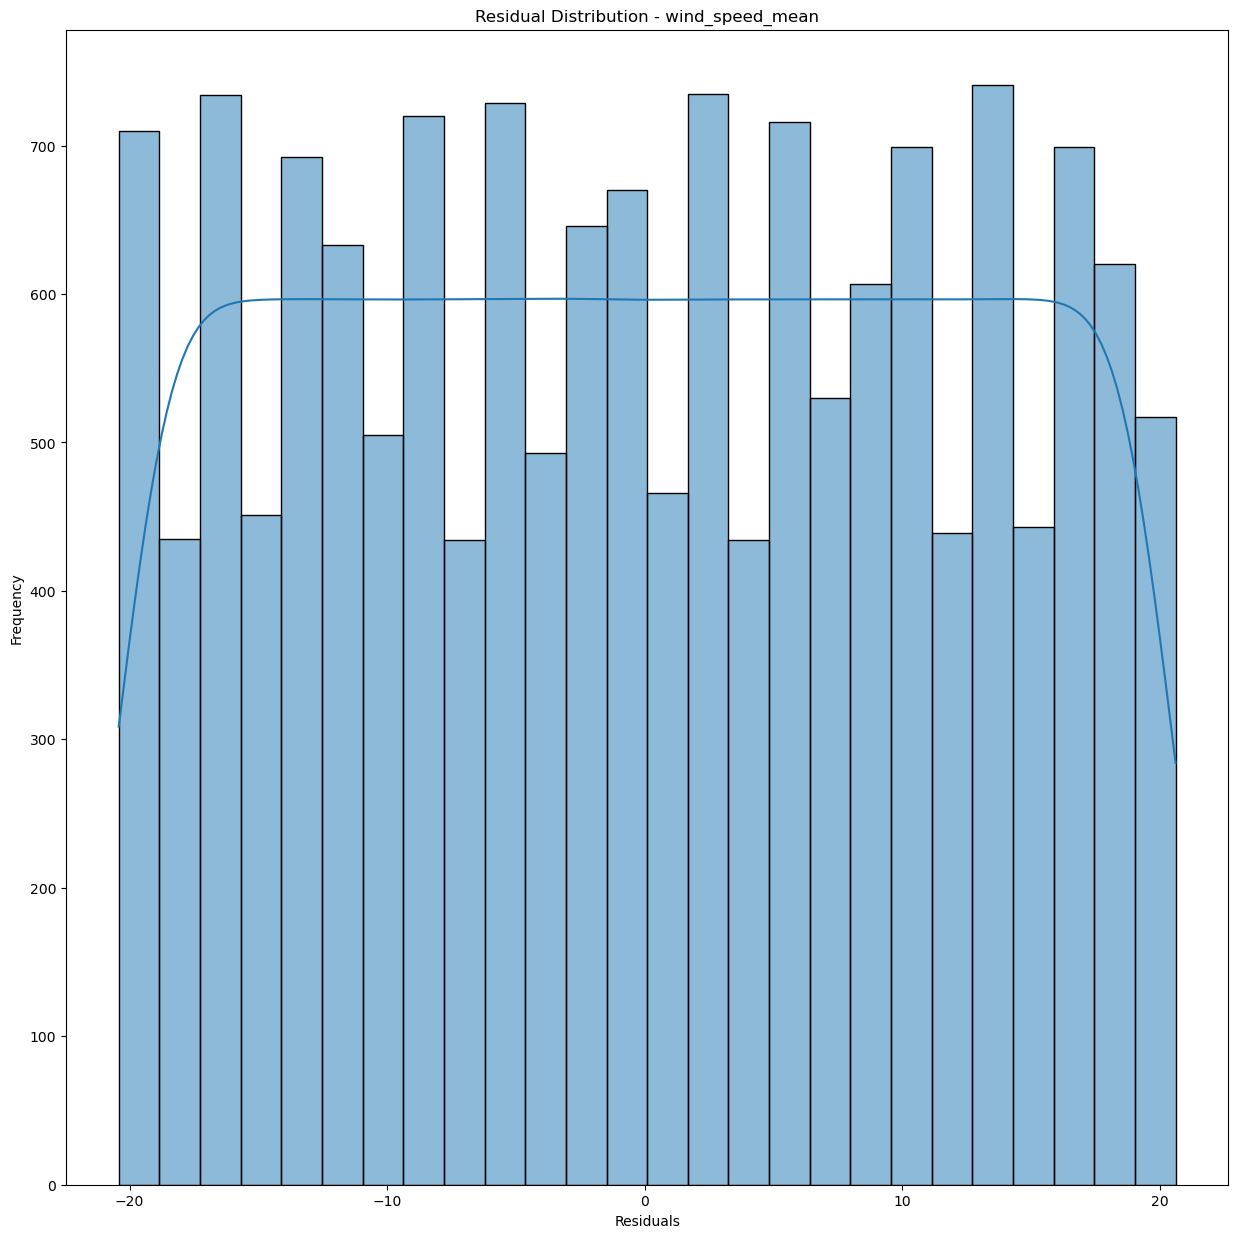

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Target Variable:", target_variable)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print()

mae_values = [train_mae, test_mae]
mse_values = [train_mse, test_mse]
rmse_values = [train_rmse, test_rmse]
r2_values = [train_r2, test_r2]

labels = ['Training Set', 'Test Set']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, mae_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Mean Absolute Error (MAE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Mean Squared Error (MSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Root Mean Squared Error (RMSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, r2_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('R2', fontsize=12)
plt.title('R-squared (R2) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(top=1)
plt.grid(axis='y', linestyle='--')
plt.show()

residuals = np.squeeze(y_test) - np.squeeze(test_predictions)
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot - {}'.format(target_variable))
plt.show()

feature_names = X_train.columns
feature_importances = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(feature_importances), axis=1)
plt.figure(figsize=(25, 15))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - {}'.format(target_variable))
plt.show()


plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Line Chart) - {}'.format(target_variable))
plt.legend()
plt.show()

plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(15, 15))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution - {}'.format(target_variable))
plt.show()


In [19]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y
X_train, y_train = split_data(big_train_df, 'Turbulence', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'Turbulence', columns_to_drop)


Epoch 1/100
1940/1940 [==============================] - 3s 1ms/step - loss: 666.7725 - val_loss: 2.9423
Epoch 2/100
1940/1940 [==============================] - 2s 1ms/step - loss: 4.4098 - val_loss: 1.5808
Epoch 3/100
1940/1940 [==============================] - 2s 1ms/step - loss: 16.6977 - val_loss: 8.7179
Epoch 4/100
1940/1940 [==============================] - 2s 1ms/step - loss: 14.1051 - val_loss: 0.5656
Epoch 5/100
1940/1940 [==============================] - 2s 1ms/step - loss: 9.1457 - val_loss: 1.0821
Epoch 6/100
1940/1940 [==============================] - 2s 1ms/step - loss: 4.8393 - val_loss: 18.5617
Epoch 7/100
1940/1940 [==============================] - 3s 1ms/step - loss: 5.0842 - val_loss: 0.8880
Epoch 8/100
1940/1940 [==============================] - 2s 1ms/step - loss: 4.7089 - val_loss: 0.5710
Epoch 9/100
1940/1940 [==============================] - 2s 1ms/step - loss: 1.8213 - val_loss: 0.8896
Epoch 10/100
1940/1940 [==============================] - 2s 1ms/ste

1940/1940 [==============================] - 2s 1ms/step - loss: 7.8285e-04 - val_loss: 0.0010
Epoch 77/100
1940/1940 [==============================] - 2s 1ms/step - loss: 7.8292e-04 - val_loss: 0.0010
Epoch 78/100
1940/1940 [==============================] - 2s 1ms/step - loss: 7.8359e-04 - val_loss: 0.0010
Epoch 79/100
1940/1940 [==============================] - 2s 1ms/step - loss: 7.8308e-04 - val_loss: 0.0010
Epoch 80/100
1940/1940 [==============================] - 2s 1ms/step - loss: 7.8232e-04 - val_loss: 0.0010
Epoch 81/100
1940/1940 [==============================] - 2s 1ms/step - loss: 7.8301e-04 - val_loss: 0.0010
Epoch 82/100
1940/1940 [==============================] - 2s 1ms/step - loss: 7.8336e-04 - val_loss: 0.0010
Epoch 83/100
1940/1940 [==============================] - 2s 1ms/step - loss: 7.8292e-04 - val_loss: 0.0010
Epoch 84/100
1940/1940 [==============================] - 2s 1ms/step - loss: 7.8328e-04 - val_loss: 0.0010
Epoch 85/100
1940/1940 [=================

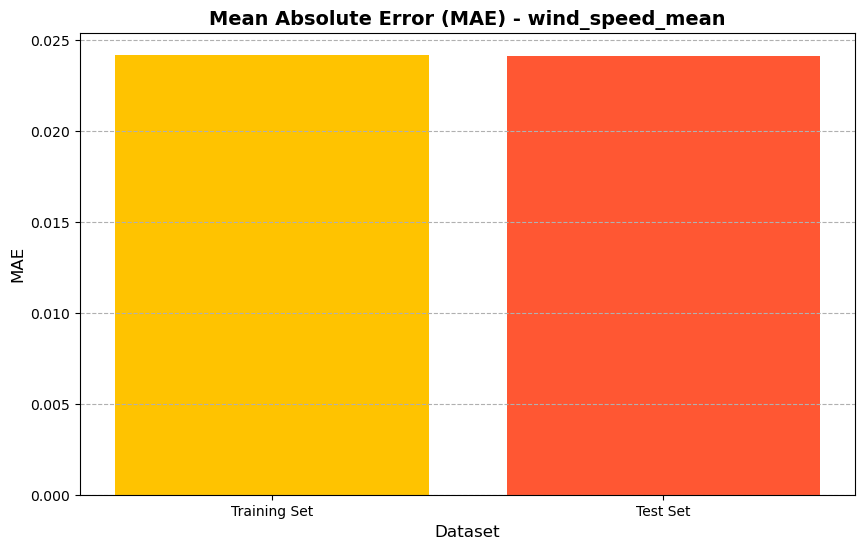

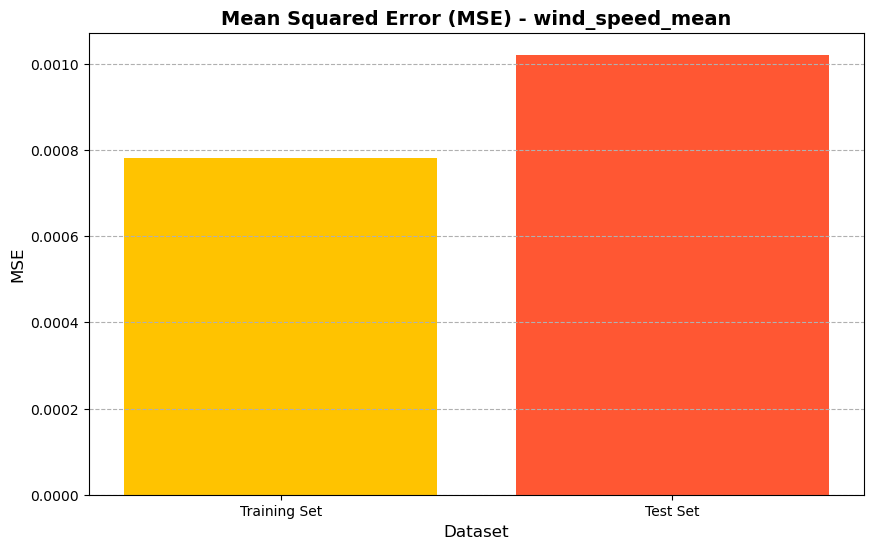

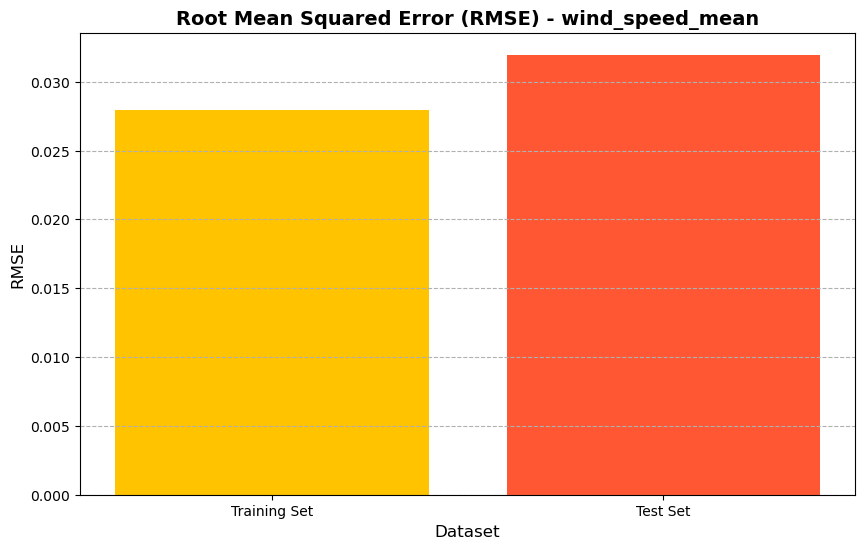

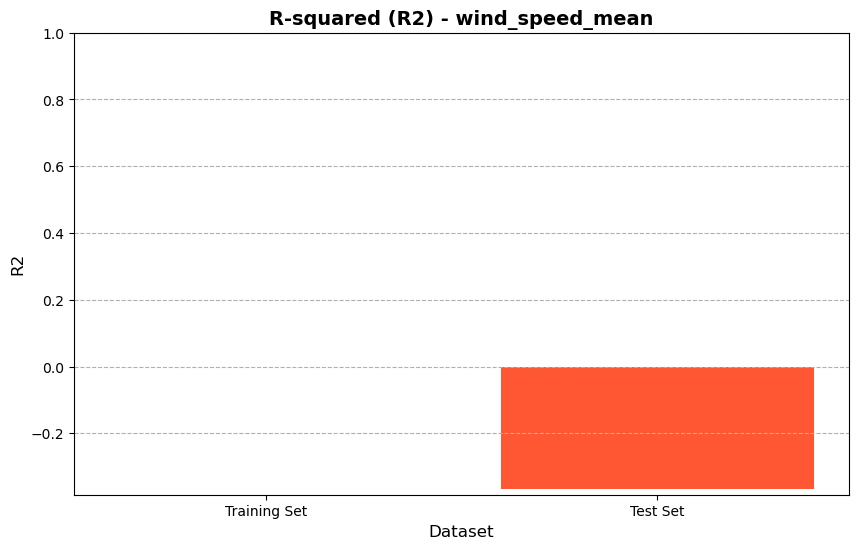

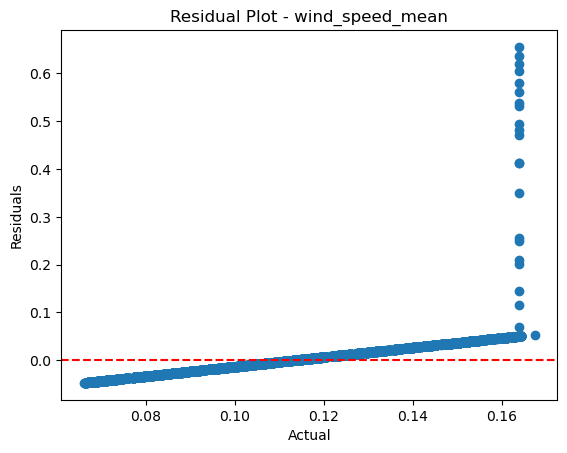

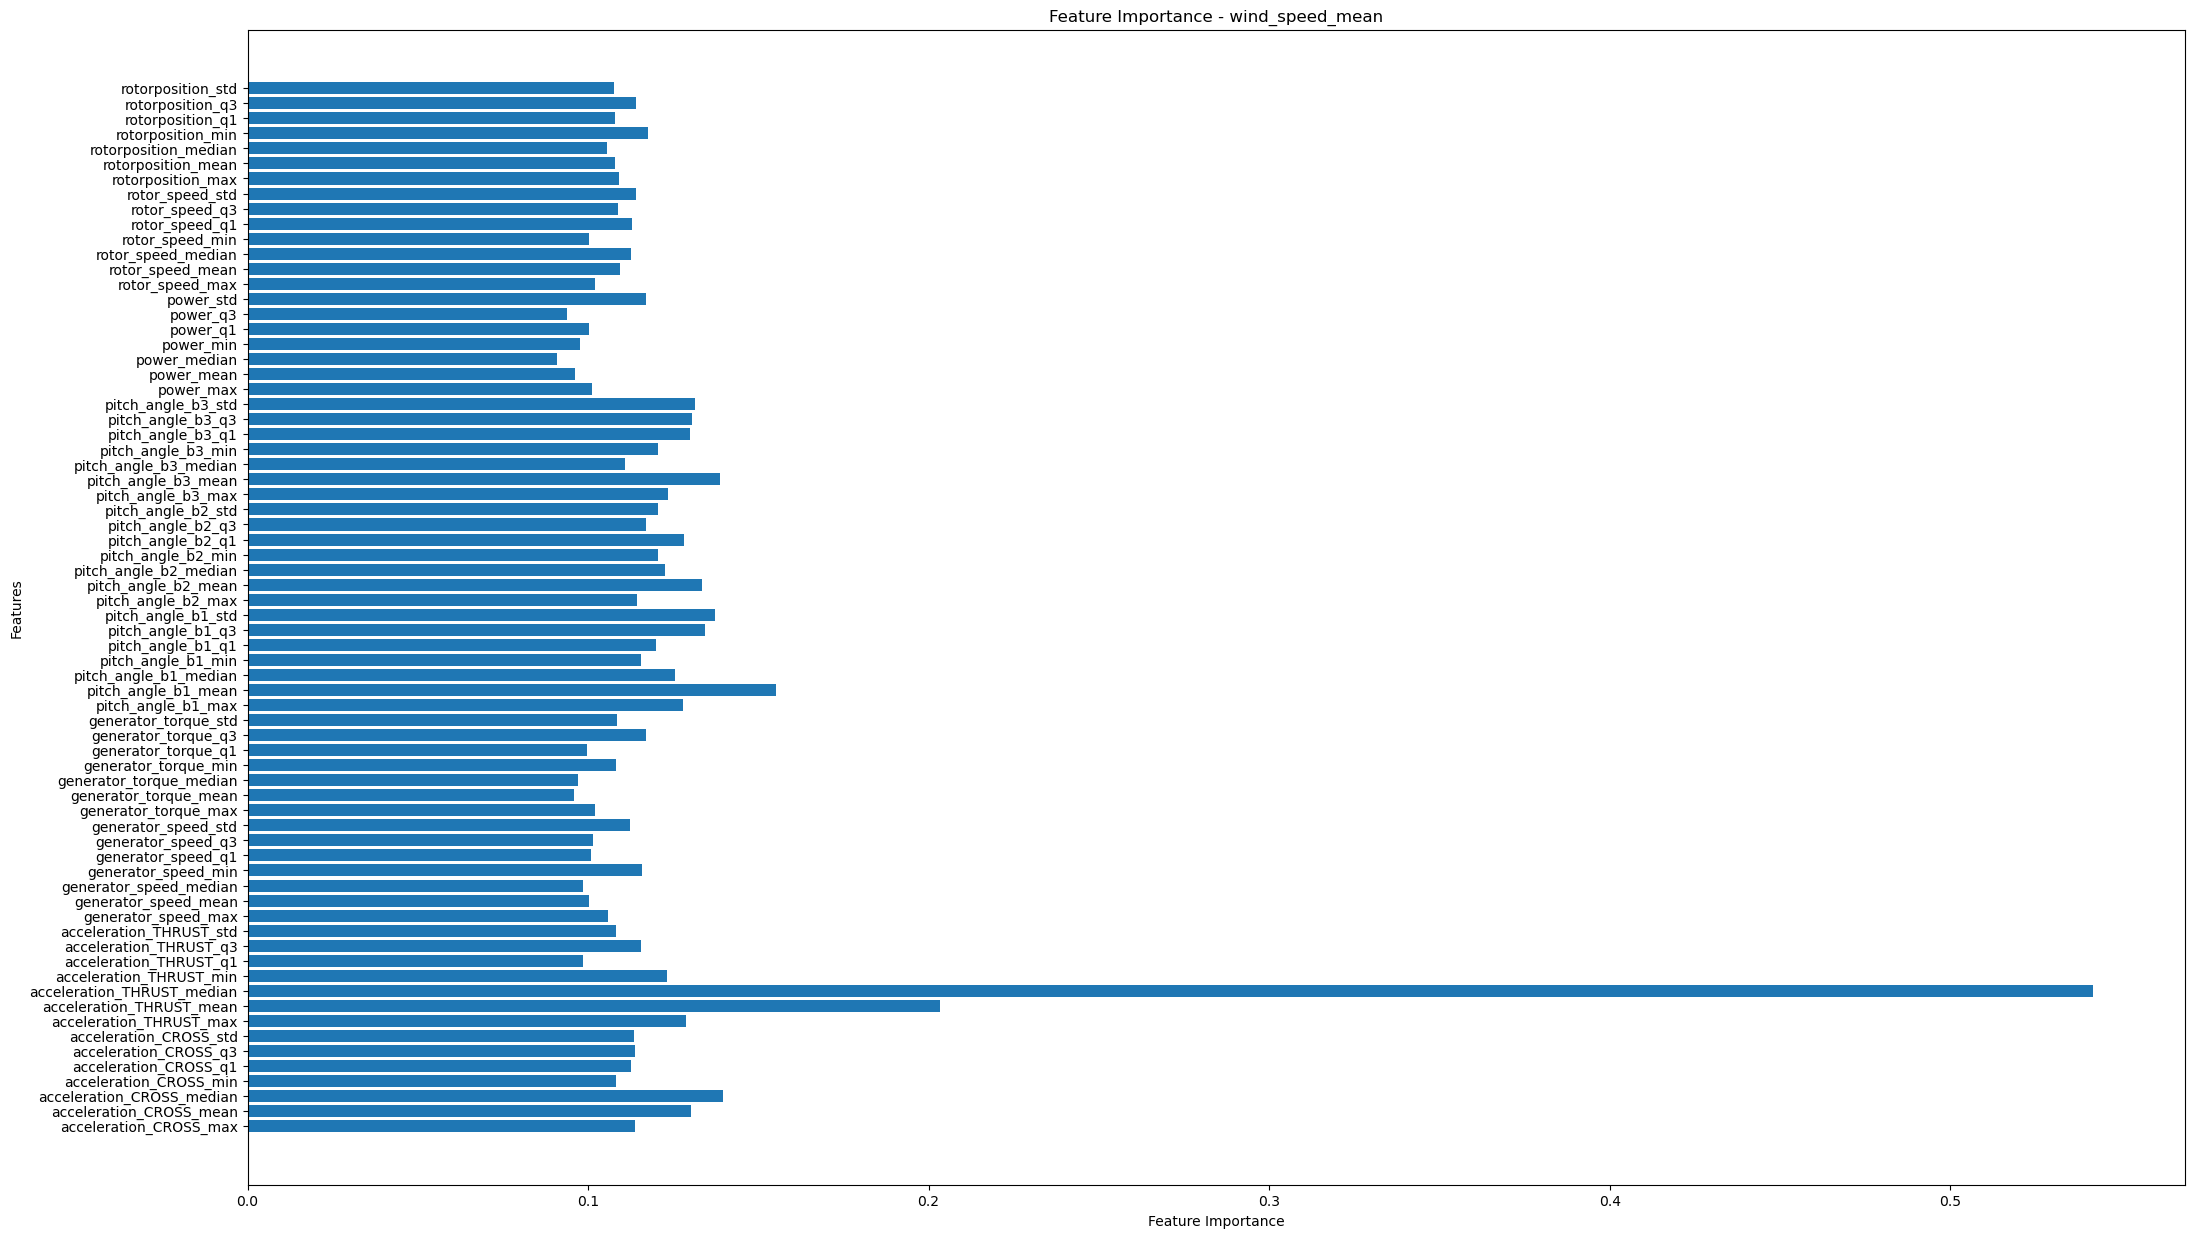

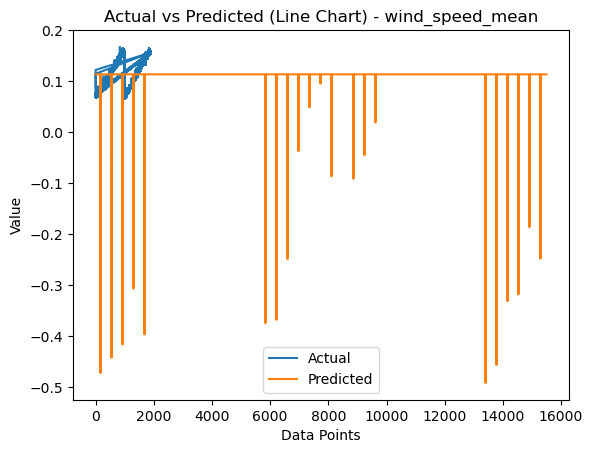

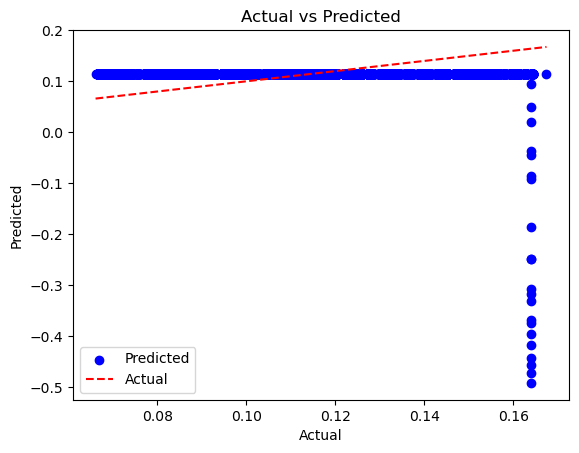

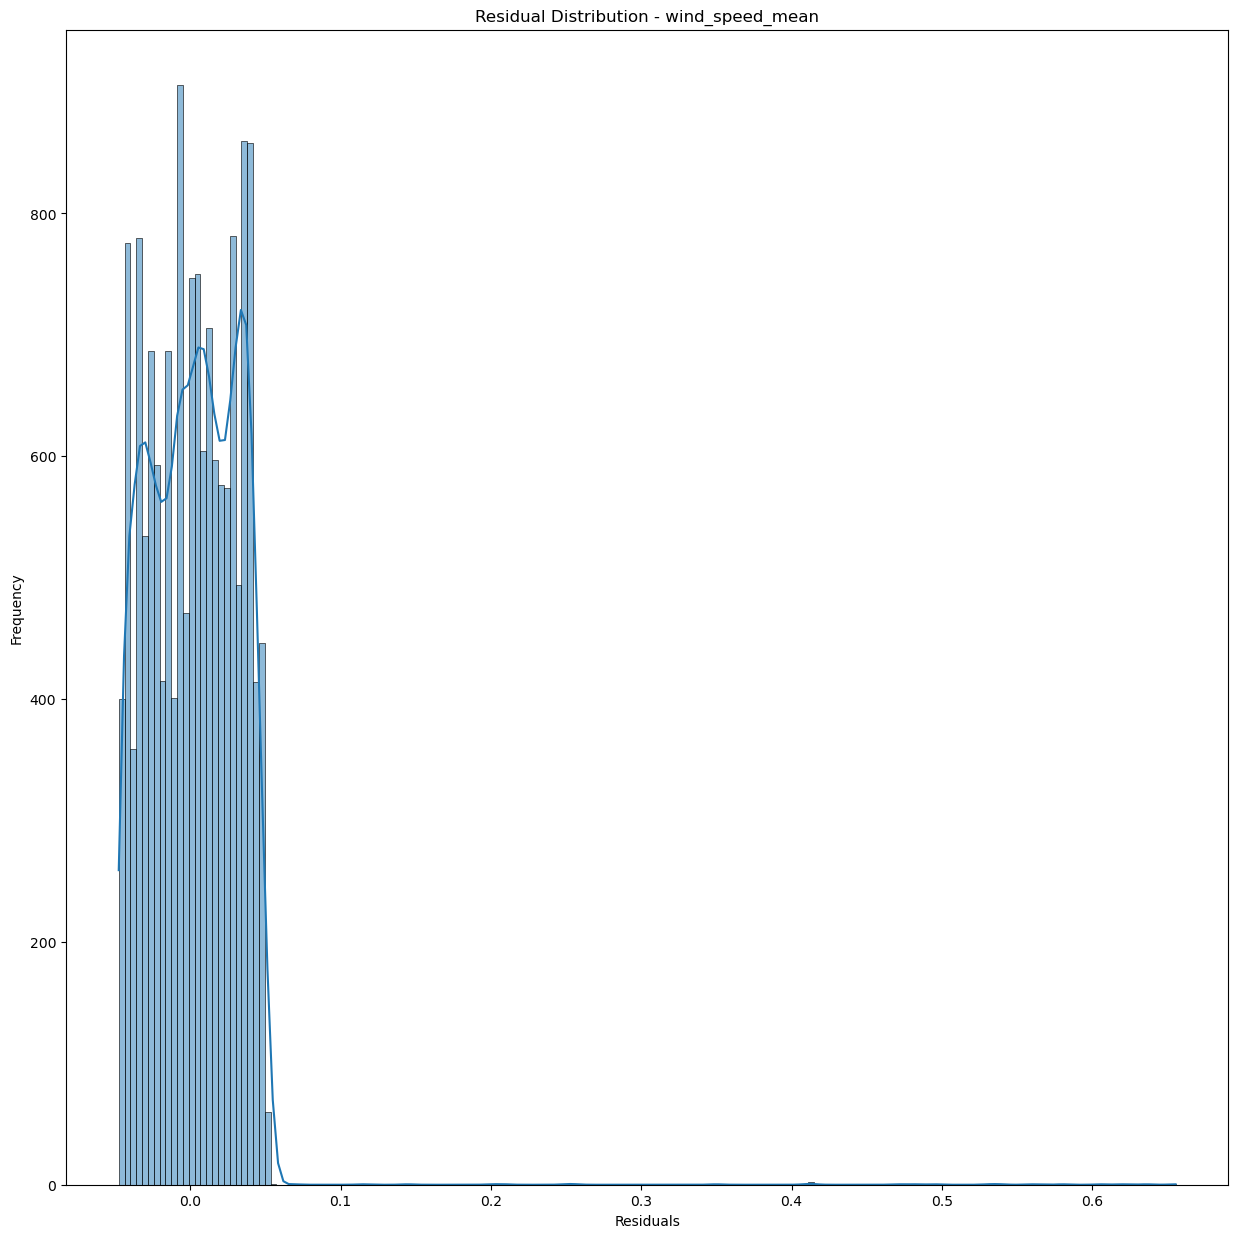

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Target Variable:", target_variable)
print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print()

mae_values = [train_mae, test_mae]
mse_values = [train_mse, test_mse]
rmse_values = [train_rmse, test_rmse]
r2_values = [train_r2, test_r2]

labels = ['Training Set', 'Test Set']
x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, mae_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Mean Absolute Error (MAE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Mean Squared Error (MSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Root Mean Squared Error (RMSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, r2_values, color=['#FFC300', '#FF5733'])
plt.xticks(x, labels)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('R2', fontsize=12)
plt.title('R-squared (R2) - {}'.format(target_variable), fontsize=14, fontweight='bold')
plt.ylim(top=1)
plt.grid(axis='y', linestyle='--')
plt.show()

residuals = np.squeeze(y_test) - np.squeeze(test_predictions)
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot - {}'.format(target_variable))
plt.show()

feature_names = X_train.columns
feature_importances = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(feature_importances), axis=1)
plt.figure(figsize=(25, 15))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - {}'.format(target_variable))
plt.show()


plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted (Line Chart) - {}'.format(target_variable))
plt.legend()
plt.show()

plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(15, 15))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution - {}'.format(target_variable))
plt.show()
